# Document Similarity using cosine similarity

In [1]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path = 'docs'
file_names = [f'text{i}.txt' for i in range(1, 7)] # 6 files, 5 and 6 exactly same for testing

In [3]:
docs = []
for file_name in file_names:
    with open(os.path.join(path, file_name), 'r') as file:
        docs.append(file.read())

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(docs)

In [5]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [6]:
print("Cosine Pairwise Similarity Matrix:")
print(cosine_sim)

Cosine Pairwise Similarity Matrix:
[[1.         0.05335092 0.05324781 0.0721144  0.07933559 0.07933559]
 [0.05335092 1.         0.03536877 0.05362989 0.05835036 0.05835036]
 [0.05324781 0.03536877 1.         0.03980889 0.0595561  0.0595561 ]
 [0.0721144  0.05362989 0.03980889 1.         0.03947118 0.03947118]
 [0.07933559 0.05835036 0.0595561  0.03947118 1.         1.        ]
 [0.07933559 0.05835036 0.0595561  0.03947118 1.         1.        ]]


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # dimensionality reduction for visualisation
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())
document_labels = [f"Document {i}" for i in range(1, 7)]

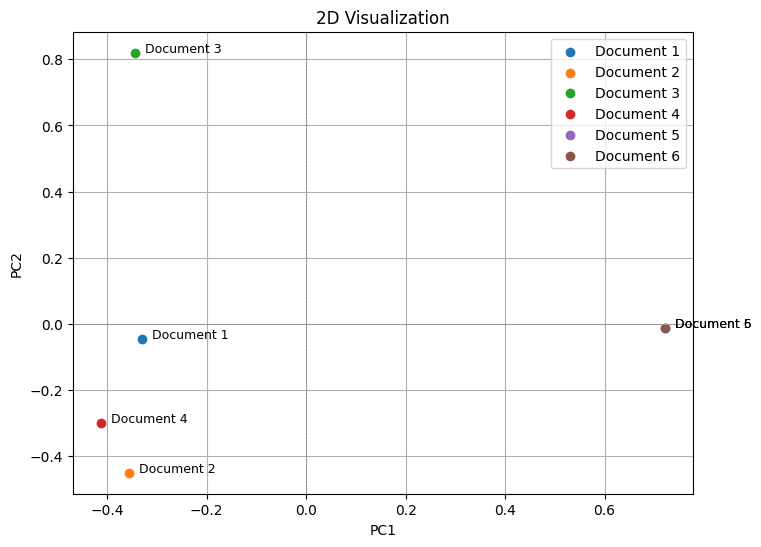

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot for visualization
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_vectors):
    plt.scatter(x, y, label=document_labels[i])
    plt.text(x + 0.02, y, document_labels[i], fontsize=9)

plt.title("2D Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()